Bima Putra Wicaksono_2141720255

Teknik Informatika 3E

Teknologi Informasi

UTS

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

JAWABAN

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google

import os
import random
os.getcwd()

from sklearn.cluster import KMeans


In [52]:
num_clusters = 3

directory = "/content/drive/MyDrive/Machine Learning/Colab Notebooks/images"

In [64]:
  # Mengambil File dari variabel directory
image = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

In [65]:
# Menyimpan gambar random dari file sebanyak 5
select_images = random.sample(image, 5)

Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.
Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.
Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.
Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.
Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.


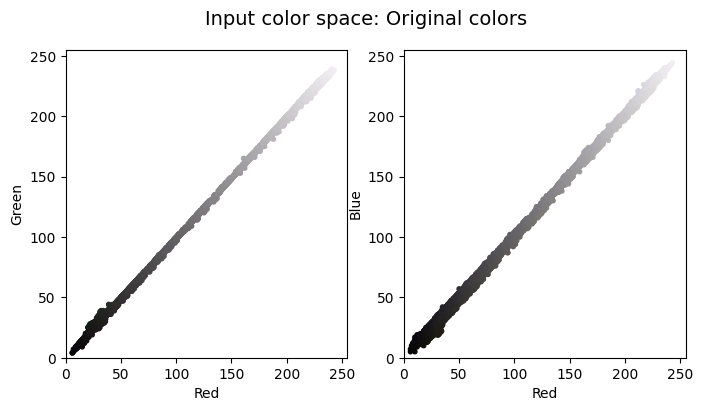

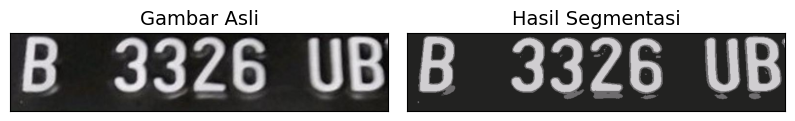

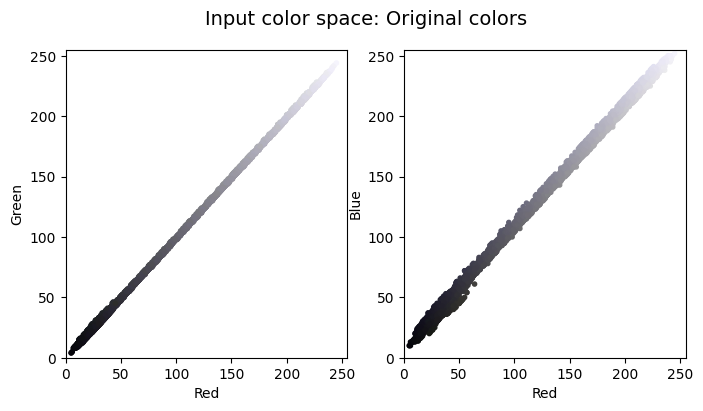

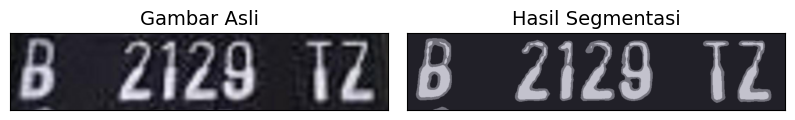

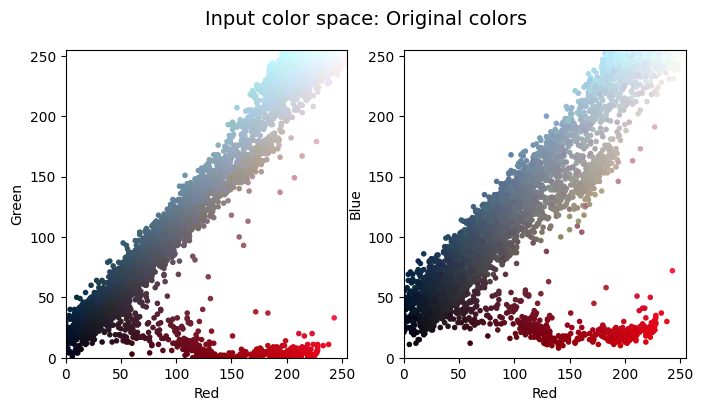

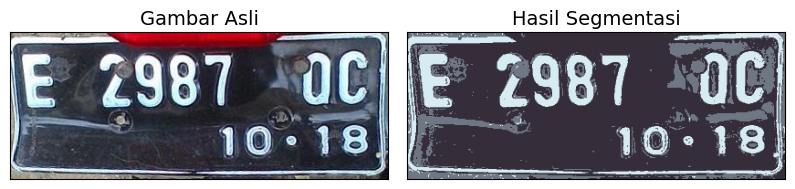

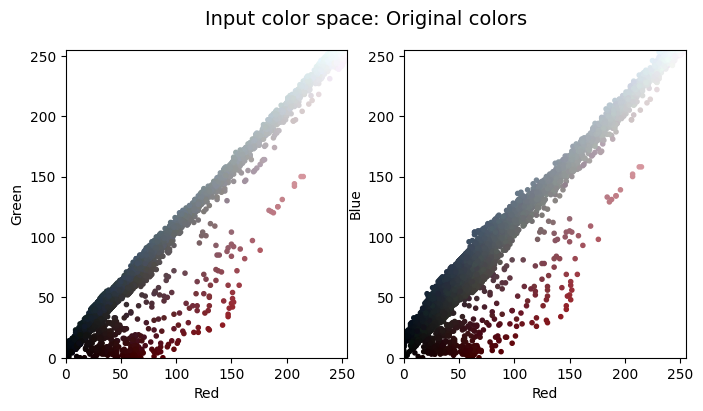

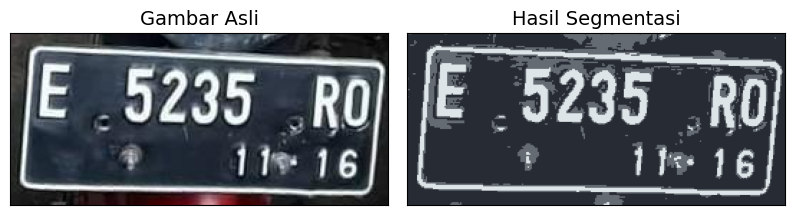

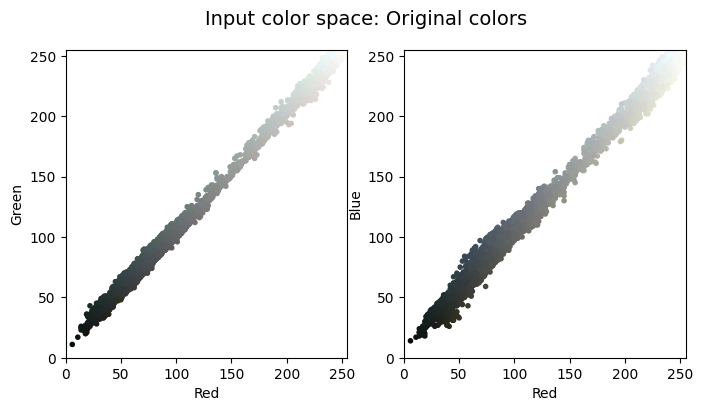

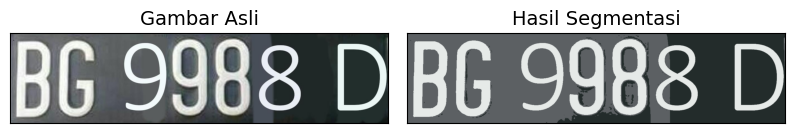

In [68]:
# Loop melalui setiap file gambar yang dipilih secara acak
for image in select_images:
    # Dapatkan path lengkap ke file gambar
    img_path = os.path.join(directory, image)

    # Baca gambar
    img = cv2.imread(img_path)

    # Konversi gambar ke ruang warna RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, ch = img_rgb.shape

    data = img_rgb.reshape(h * w, ch)

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
          colors = data

        # Pilih subset data secara acak
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, c=colors/255.0, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

        ax[1].scatter(R, B, c=colors/255.0, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

        fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: Original colors')

    # Mendefinisikan model KMeans dengan penyesuaian Jumlah cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=1)

    # Fit data model k-means
    kmeans.fit(data)

    # Mendapatkan nilai titik tengah dari setiap cluster
    cluster_centers = kmeans.cluster_centers_

    # inisialisasi new_colors
    new_colors = cluster_centers[kmeans.labels_].reshape(img.shape)

    fig, ax = plt.subplots(1, 2, figsize=(10, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)

    ax[0].imshow(img_rgb)
    ax[0].set_title('Gambar Asli', size=14)

    ax[1].imshow(new_colors.astype(np.uint8))
    ax[1].set_title('Hasil Segmentasi', size=14)

    print("Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.")